In [1]:
import warnings
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import pandas as pd

In [2]:
df= pd.read_csv(r'C:\Users\Mcc\Downloads\new_retail_data.csv')

In [3]:
df.head()

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,...,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,8691788.0,37249.0,Michelle Harrington,Ebony39@gmail.com,1.414787e+09,3959 Amanda Burgs,Dortmund,Berlin,77985.0,Germany,...,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,2174773.0,69749.0,Kelsey Hill,Mark36@gmail.com,6.852900e+09,82072 Dawn Centers,Nottingham,England,99071.0,UK,...,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,6679610.0,30192.0,Scott Jensen,Shane85@gmail.com,8.362160e+09,4133 Young Canyon,Geelong,New South Wales,75929.0,Australia,...,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment
3,7232460.0,62101.0,Joseph Miller,Mary34@gmail.com,2.776752e+09,8148 Thomas Creek Suite 100,Edmonton,Ontario,88420.0,Canada,...,2466.854021,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife
4,4983775.0,27901.0,Debra Coleman,Charles30@gmail.com,9.098268e+09,5813 Lori Ports Suite 269,Bristol,England,48704.0,UK,...,248.553049,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies


In [4]:
# check shape of data
df.shape

(302010, 30)

In [5]:
# check columns in dataset
df.columns

Index(['Transaction_ID', 'Customer_ID', 'Name', 'Email', 'Phone', 'Address',
       'City', 'State', 'Zipcode', 'Country', 'Age', 'Gender', 'Income',
       'Customer_Segment', 'Date', 'Year', 'Month', 'Time', 'Total_Purchases',
       'Amount', 'Total_Amount', 'Product_Category', 'Product_Brand',
       'Product_Type', 'Feedback', 'Shipping_Method', 'Payment_Method',
       'Order_Status', 'Ratings', 'products'],
      dtype='object')

# Basic Cleaning

In [6]:
# check duplicate values in dataset
df.duplicated().sum()

4

In [7]:
# check null values
df.isnull().sum()

Transaction_ID      333
Customer_ID         308
Name                382
Email               347
Phone               362
Address             315
City                248
State               281
Zipcode             340
Country             271
Age                 173
Gender              317
Income              290
Customer_Segment    215
Date                359
Year                350
Month               273
Time                350
Total_Purchases     361
Amount              357
Total_Amount        350
Product_Category    283
Product_Brand       281
Product_Type          0
Feedback            184
Shipping_Method     337
Payment_Method      297
Order_Status        235
Ratings             184
products              0
dtype: int64

In [8]:
# remove null values 
df.dropna(inplace=True)

In [9]:
# remove duplicates values 
df.drop_duplicates(inplace=True)

In [10]:
# check data type 
df.dtypes

Transaction_ID      float64
Customer_ID         float64
Name                 object
Email                object
Phone               float64
Address              object
City                 object
State                object
Zipcode             float64
Country              object
Age                 float64
Gender               object
Income               object
Customer_Segment     object
Date                 object
Year                float64
Month                object
Time                 object
Total_Purchases     float64
Amount              float64
Total_Amount        float64
Product_Category     object
Product_Brand        object
Product_Type         object
Feedback             object
Shipping_Method      object
Payment_Method       object
Order_Status         object
Ratings             float64
products             object
dtype: object

In [11]:
# check information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293908 entries, 0 to 302009
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    293908 non-null  float64
 1   Customer_ID       293908 non-null  float64
 2   Name              293908 non-null  object 
 3   Email             293908 non-null  object 
 4   Phone             293908 non-null  float64
 5   Address           293908 non-null  object 
 6   City              293908 non-null  object 
 7   State             293908 non-null  object 
 8   Zipcode           293908 non-null  float64
 9   Country           293908 non-null  object 
 10  Age               293908 non-null  float64
 11  Gender            293908 non-null  object 
 12  Income            293908 non-null  object 
 13  Customer_Segment  293908 non-null  object 
 14  Date              293908 non-null  object 
 15  Year              293908 non-null  float64
 16  Month             29

In [12]:
# summary statistics
df.describe()

,Transaction_ID,Customer_ID,Phone,Zipcode,Age,Year,Total_Purchases,Amount,Total_Amount,Ratings
count,2.939080e+05,293908.000000,2.939080e+05,293908.000000,293908.000000,293908.000000,293908.000000,293908.000000,293908.000000,293908.000000
mean,5.493739e+06,55013.638431,5.500609e+09,50288.456520,35.465530,2023.165127,5.359837,255.153875,1367.684180,3.162320
std,2.596095e+06,26009.429623,2.596116e+09,28976.636935,15.017638,0.371295,2.868441,141.389109,1128.898840,1.320755
min,1.000007e+06,10000.000000,1.000049e+09,501.000000,18.000000,2023.000000,1.000000,10.000219,10.003750,1.000000
25%,3.245886e+06,32470.000000,3.253507e+09,25408.000000,22.000000,2023.000000,3.000000,132.837594,438.844052,2.000000
50%,5.495915e+06,55027.000000,5.504455e+09,50586.000000,32.000000,2023.000000,5.000000,255.464523,1041.164290,3.000000
75%,7.738210e+06,77514.000000,7.749807e+09,75252.250000,46.000000,2023.000000,8.000000,377.639394,2028.951754,4.000000
max,9.999995e+06,99999.000000,9.999996e+09,99949.000000,70.000000,2024.000000,10.000000,499.997911,4999.625796,5.000000


Convert Data Type

In [13]:
# Convert specified columns to integer
df['Age'] = df['Age'].astype('int')
df['Year'] = df['Year'].astype('int')
df['Total_Purchases'] = df['Total_Purchases'].astype('int')
df['Amount'] = df['Amount'].astype('int')
df['Total_Amount'] = df['Total_Amount'].astype('int')
df['Ratings'] = df['Ratings'].astype('int')

In [14]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Extract year, month, and day
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# convert datatype
df['Year']=df['Year'].astype('int')

Remove Multiple Columns

In [15]:
# Remove multiple columns
df = df.drop(columns=['Transaction_ID', 'Customer_ID', 'Phone', 'Email', 'Address','Zipcode'])


In [16]:
pd.set_option('display.max_rows', None)

In [17]:
# check unique values each columns
df.nunique()

Name                156638
City                   130
State                   54
Country                  5
Age                     53
Gender                   2
Income                   3
Customer_Segment         3
Date                   366
Year                     2
Month                   12
Time                 83435
Total_Purchases         10
Amount                 490
Total_Amount          4985
Product_Category         5
Product_Brand           18
Product_Type            33
Feedback                 4
Shipping_Method          3
Payment_Method           4
Order_Status             4
Ratings                  5
products               318
Day                     31
dtype: int64

# Exploratory Data Analysis

In [18]:
# Count of city
df['City'].value_counts()

Chicago                21109
Portsmouth             19648
San Francisco          11938
Frankfurt               9947
Boston                  9187
New York                5321
Fort Worth              5090
London                  4345
Winnipeg                2355
Birmingham              2313
Mackay                  2298
Calgary                 2283
Edmonton                2279
Victoria                2273
Geelong                 2270
Leeds                   2261
Edinburgh               2256
Brisbane                2252
Bendigo                 2250
Perth                   2250
Bielefeld               2247
Darwin                  2245
Hobart                  2239
Saskatoon               2236
Plymouth                2236
Townsville              2233
Hanover                 2233
Stuttgart               2224
Munich                  2223
Launceston              2220
Toronto                 2220
Brighton                2217
Cardiff                 2216
Wuppertal               2213
Albury-Wodonga

In [19]:
# Count Of state
df['State'].value_counts()

England            61397
Berlin             51432
New South Wales    44170
Ontario            44109
Connecticut        21120
Maine              11953
Georgia             9278
Kansas              5375
New Mexico          5077
New York             970
Maryland             955
Pennsylvania         937
California           926
Nevada               921
Ohio                 921
Illinois             921
Iowa                 920
Minnesota            919
Texas                919
South Carolina       912
Mississippi          912
Hawaii               907
Utah                 902
Michigan             901
West Virginia        899
Louisiana            897
New Jersey           894
Alabama              889
Virginia             888
North Carolina       883
Delaware             883
Oregon               881
Wyoming              880
Rhode Island         879
South Dakota         878
Nebraska             877
Indiana              876
Missouri             876
Wisconsin            876
Montana              875


In [20]:
# Count Of Country
df['Country'].value_counts()

USA          92800
UK           61397
Germany      51432
Australia    44170
Canada       44109
Name: Country, dtype: int64

In [21]:
# Count Of Age
df['Age'].value_counts()

20    33715
46    29841
26    24118
22    22421
34    20162
23    17611
19    16447
21     7861
24     6027
55     5317
48     4491
70     2658
43     2634
59     2618
36     2596
33     2584
68     2578
64     2574
56     2570
30     2561
44     2561
65     2554
60     2551
62     2545
47     2535
39     2532
40     2530
52     2527
35     2520
57     2516
61     2516
28     2516
41     2515
58     2515
37     2514
50     2512
25     2507
49     2504
69     2503
42     2503
27     2502
63     2497
38     2495
45     2491
51     2479
29     2478
67     2476
53     2473
32     2467
54     2442
18     2424
66     2423
31     2401
Name: Age, dtype: int64

In [22]:
# Count of Gender
df['Gender'].value_counts()

Male      182762
Female    111146
Name: Gender, dtype: int64

In [23]:
# Count of income 
df['Income'].value_counts()

Medium    126895
Low        93670
High       73343
Name: Income, dtype: int64

In [24]:
# Count OF Customer Segement
df['Customer_Segment'].value_counts()

Regular    142548
New         88763
Premium     62597
Name: Customer_Segment, dtype: int64

In [25]:
# Count Of the Product Category
df['Product_Category'].value_counts()

Electronics    69365
Grocery        65125
Clothing       53280
Books          53199
Home Decor     52939
Name: Product_Category, dtype: int64

In [26]:
# Count Of the Product Brand
df['Product_Brand'].value_counts()

Pepsi                29537
Coca-Cola            17951
HarperCollins        17901
Zara                 17876
Samsung              17866
Sony                 17848
Adidas               17758
Bed Bath & Beyond    17746
Home Depot           17673
Random House         17671
Nike                 17646
Nestle               17637
Penguin Books        17627
Apple                17574
IKEA                 17520
Whirepool             7289
Mitsubhisi            6580
BlueStar              2208
Name: Product_Brand, dtype: int64

In [27]:
# Count Of the Product_Types
df['Product_Type'].value_counts()

Water                                 23838
Smartphone                            17929
Non-Fiction                           17672
Fiction                               17544
Juice                                 11919
Television                            11874
T-shirt                               11870
Decorations                           11835
Shoes                                 11808
Tablet                                11754
Soft Drink                            11731
Furniture                             11671
Fridge                                 7289
Mitsubishi 1.5 Ton 3 Star Split AC     6580
Thriller                               6112
Kitchen                                6041
Coffee                                 6000
Children's                             5970
Jeans                                  5966
Shirt                                  5955
Dress                                  5955
Chocolate                              5920
Headphones                      

In [28]:
# Count Of the Feedback
df['Feedback'].value_counts()

Excellent    98016
Good         92696
Average      61018
Bad          42178
Name: Feedback, dtype: int64

In [29]:
# Count Of the Shipping Method
df['Shipping_Method'].value_counts()

Same-Day    101540
Express      99599
Standard     92769
Name: Shipping_Method, dtype: int64

In [30]:
# Count of the Payment Method
df['Payment_Method'].value_counts()

Credit Card    87780
Debit Card     74744
Cash           71925
PayPal         59459
Name: Payment_Method, dtype: int64

In [31]:
# count of the Order_Status
df['Order_Status'].value_counts()

Delivered     127238
Shipped        63275
Processing     55654
Pending        47741
Name: Order_Status, dtype: int64

In [32]:
# Count of the Products
df['products'].value_counts()

Spring water                    2441
Bottled water                   2428
Mystery                         2426
Alkaline water                  2412
Artesian water                  2410
Distilled water                 2409
Adventure                       2372
Flavored water                  2366
Coconut water                   2366
Mineral water                   2361
Sparkling water                 2341
Purified water                  2304
Literary fiction                2257
Motorola Moto                   1916
History                         1859
Google Pixel                    1838
Self-help                       1830
Historical fiction              1820
Horror                          1816
Samsung Galaxy                  1807
Travel                          1807
Biography                       1794
OnePlus                         1787
Sony Xperia                     1787
iPhone                          1780
Xiaomi Mi                       1775
Cooking                         1765
P

In [33]:
# sum of all ratings
df['Ratings'].sum()

929431

In [34]:
# sum of total purchases
df['Total_Purchases'].sum()

1575299

In [35]:
# sum of total amount
df['Total_Amount'].sum()

401826431

# Top 10 City With Highest Total Amount 

In [39]:
# top 10 city with maximum total amount using group by funcation
plt.figure(figsize=(12,4))
top_city = df.groupby('City')['Total_Amount'].sum().reset_index()
# convert values in million
top_city ['Total_Amount'] = top_city['Total_Amount'] / 1_000_000
# city in asceding orders
top_10_city = top_city.sort_values(by='Total_Amount',ascending=False).head(10)

# create a barplot
ax=sns.barplot(data=top_10_city,x='City',y='Total_Amount')
for bars in ax.containers:
    ax.bar_label(bars,fmt='%.2fM')

plt.xlabel('Names of the cities')
plt.ylabel('Sum of the total_amount')
plt.title('Sum Of The Total_Amount By City Wise')

SyntaxError: unterminated string literal (detected at line 12) (2836581391.py, line 12)

# Bottom 10 city with lowes total amount 

Text(0.5, 1.0, 'Sum Of The Total_Amount By City Wise')

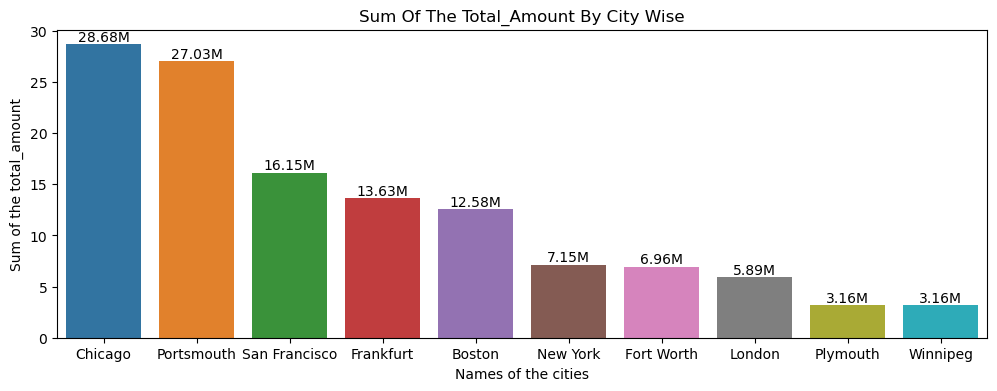

In [37]:
# bottom 10 city with maximum total amount using group by funcation
plt.figure(figsize=(12,4))
bottom_city = df.groupby('City')['Total_Amount'].sum().reset_index()
# convert values in million
bottom_city ['Total_Amount'] = bottom_city['Total_Amount'] / 1_000_000
# city in asce orders
bottom_10_city = bottom_city.sort_values(by='Total_Amount',ascending=False).tail(10)

# create a barplot
ax=sns.barplot(data=top_10_city,x='City',y='Total_Amount')
for bars in ax.containers:
    ax.bar_label(bars,fmt='%.2fM')

plt.xlabel('Names of the cities')
plt.ylabel('Sum of the total_amount')
plt.title('Sum Of The Total_Amount By City Wise')

# top 10 state with maximum total amount 

Text(0.5, 1.0, 'Sum Of The Total_Amount By states Wise')

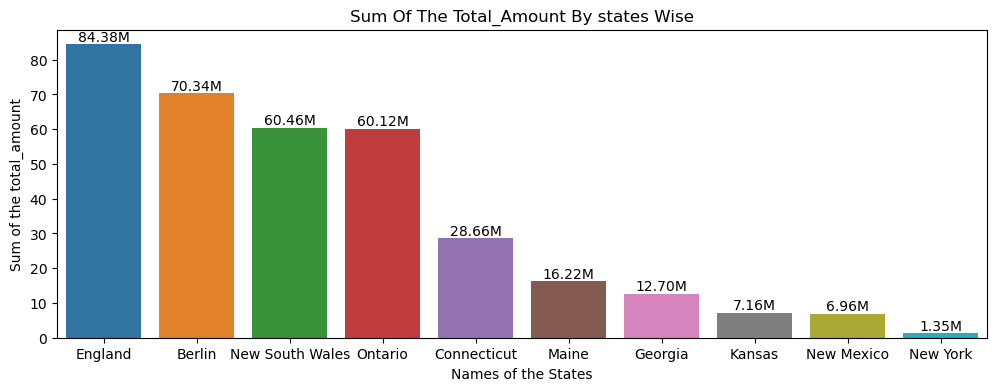

In [45]:
# top 10 state with maximum total amount using group by funcation
plt.figure(figsize=(12,4))
top_city = df.groupby('State')['Total_Amount'].sum().reset_index()
# convert values in million
top_city ['Total_Amount'] = top_city['Total_Amount'] / 1_000_000
# state in asceding orders
top_10_city = top_city.sort_values(by='Total_Amount',ascending=False).head(10)

# create a barplot
ax=sns.barplot(data=top_10_city,x='State',y='Total_Amount')
for bars in ax.containers:
    ax.bar_label(bars,fmt='%.2fM')

plt.xlabel('Names of the States')
plt.ylabel('Sum of the total_amount')
plt.title('Sum Of The Total_Amount By states Wise')

# Sum Of The Total Amount by Country Wise And Year Wise

Text(0.5, 1.0, 'Sum Of The Total Amount By Countries And Year Wise')

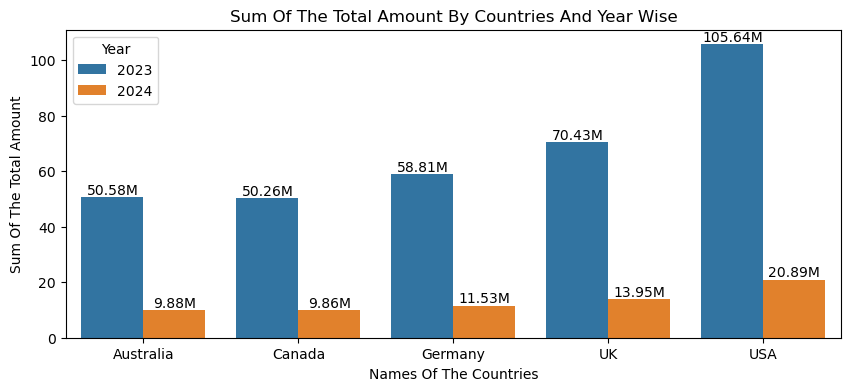

In [46]:
# sum of the total_amount by country wise
plt.figure(figsize=(10,4))
sum_of_amount=df.groupby(['Country','Year'])['Total_Amount'].sum().reset_index()

# convert values in millions
sum_of_amount['Total_Amount'] = sum_of_amount['Total_Amount'] / 1_000_000

# create a barplot
ax=sns.barplot(data=sum_of_amount,x='Country',y='Total_Amount',hue='Year')
for bars in ax.containers:
    ax.bar_label(bars,fmt='%.2fM')

plt.xlabel('Names Of The Countries')   
plt.ylabel('Sum Of The Total Amount')
plt.title('Sum Of The Total Amount By Countries And Year Wise')

# Total Amount By Gender Wise In Percentage

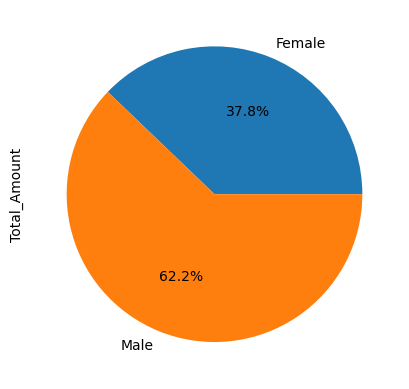

In [47]:
# Sum of Total Amount by Gender Wise           

sum_amount = df.groupby('Gender')['Total_Amount'].sum().reset_index()
# create a pie chart
sum_amount = df.groupby('Gender') ['Total_Amount'].sum().plot(kind='pie',autopct='%1.1f%%')

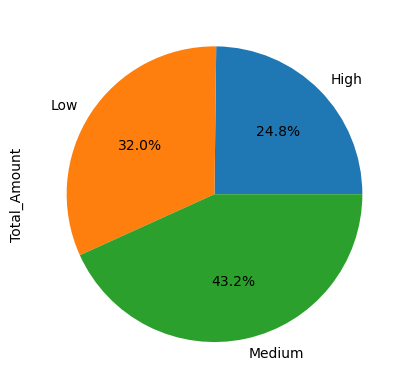

In [48]:
# Sum of Total Amount by Income Wise           

sum_amount = df.groupby('Income')['Total_Amount'].sum().reset_index()
# create a pie chart
sum_amount = df.groupby('Income') ['Total_Amount'].sum().plot(kind='pie',autopct='%1.1f%%')

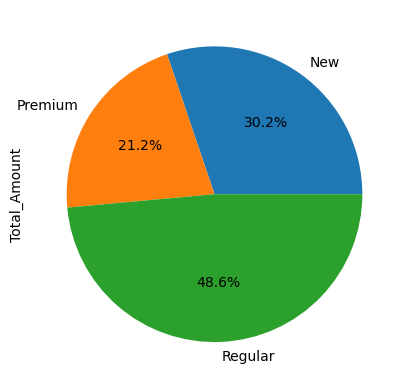

In [49]:
# Sum of Total Amount by Customoer_Segment Wise           

sum_amount = df.groupby('Customer_Segment')['Total_Amount'].sum().reset_index()
# create a pie chart
sum_amount = df.groupby('Customer_Segment') ['Total_Amount'].sum().plot(kind='pie',autopct='%1.1f%%')

# Whic Year Maximum Total Amount 

Text(0.5, 1.0, 'Sum Of Total Amount By Year Wise')

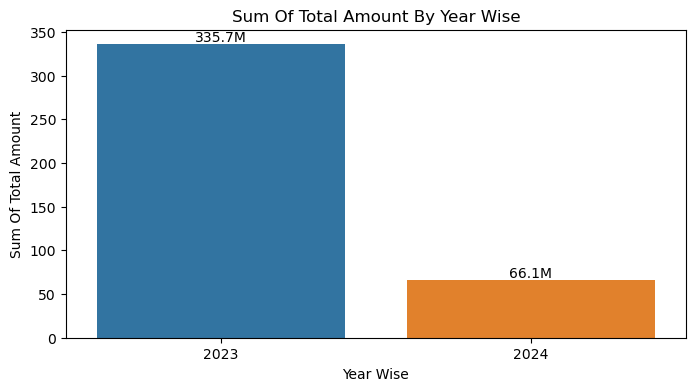

In [50]:
# sum of total Amount by Year Wise
plt.figure(figsize=(8,4))
sum_amount = df.groupby('Year')['Total_Amount'].sum().reset_index()
# convert values in millions
sum_amount ['Total_Amount'] = sum_amount['Total_Amount'] / 1_000_000
# create a barplot 
ax=sns.barplot(data=sum_amount,x='Year',y='Total_Amount')
for bars in ax.containers:
    ax.bar_label(bars,fmt='%1.1fM')
plt.xlabel('Year Wise')    
plt.ylabel('Sum Of Total Amount')
plt.title('Sum Of Total Amount By Year Wise')

Text(0.5, 1.0, 'Sum Of Total Amount By Year Wise')

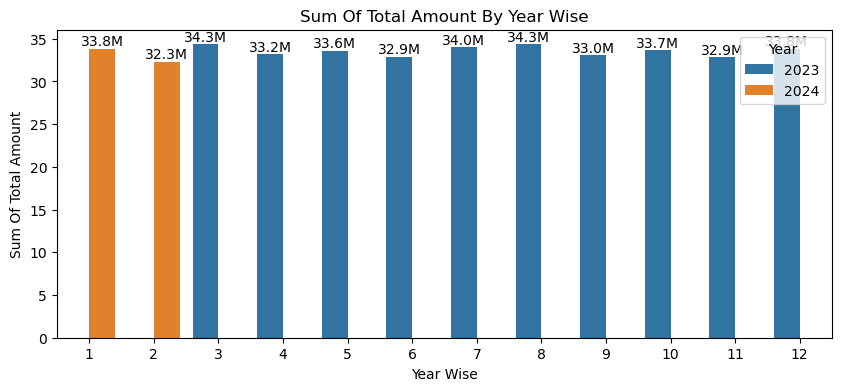

In [51]:
# sum of total Amount by Month and Year Wise
plt.figure(figsize=(10,4))
sum_amount = df.groupby(['Year','Month'])['Total_Amount'].sum().reset_index()

# convert values in millions
sum_amount ['Total_Amount'] = sum_amount['Total_Amount'] / 1_000_000
# create a barplot 
ax=sns.barplot(data=sum_amount,x='Month',y='Total_Amount',hue='Year')
for bars in ax.containers:
    ax.bar_label(bars,fmt='%1.1fM')
plt.xlabel('Year Wise')    
plt.ylabel('Sum Of Total Amount')
plt.title('Sum Of Total Amount By Year Wise')

# Sum Of Total Amount by Product Category and Year wise

Text(0.5, 1.0, 'Sum Of the total amount by Product Category')

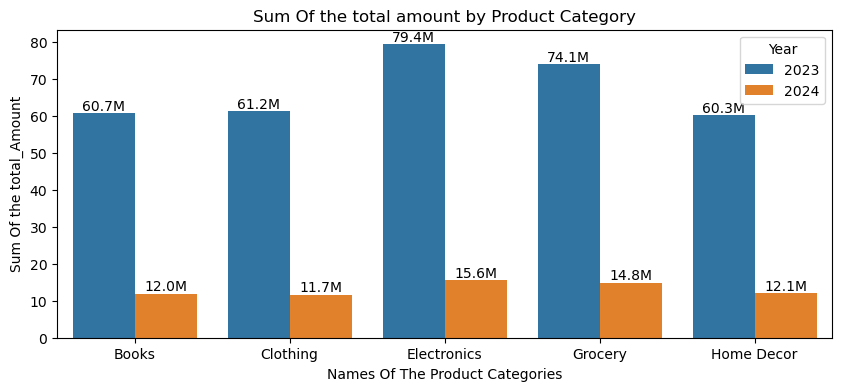

In [53]:
# sum of total amount by product category by Year wise
plt.figure(figsize=(10,4))
sum_amount = df.groupby(['Product_Category','Year'])['Total_Amount'].sum().reset_index()

# convert values in millions
sum_amount['Total_Amount'] = sum_amount['Total_Amount'] / 1_000_000

# create barplot
ax=sns.barplot(data=sum_amount,x='Product_Category',y='Total_Amount',hue='Year')
for bars in ax.containers:
    ax.bar_label(bars,fmt='%1.1fM')
plt.xlabel('Names Of The Product Categories')  
plt.ylabel('Sum Of the total_Amount')
plt.title('Sum Of the total amount by Product Category')

Average of Amount Of The Product Category

Text(0.5, 1.0, 'Average of the Each Product_Category')

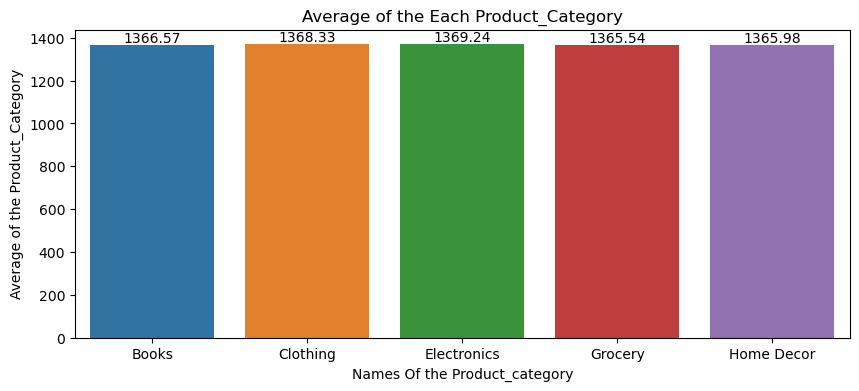

In [84]:
# Average of total amount by product category by Year wise
plt.figure(figsize=(10,4))
avg_amount = df.groupby(['Product_Category'])['Total_Amount'].mean().reset_index()

# create barplot
ax=sns.barplot(data=avg_amount,x='Product_Category',y='Total_Amount')
for bars in ax.containers:
    ax.bar_label(bars)

plt.xlabel('Names Of the Product_category')    
plt.ylabel('Average of the Product_Category')
plt.title('Average of the Each Product_Category')

Which Brand Found Good feedback

Text(0.5, 1.0, 'Count OF the Feedback By Product_Brand Wise')

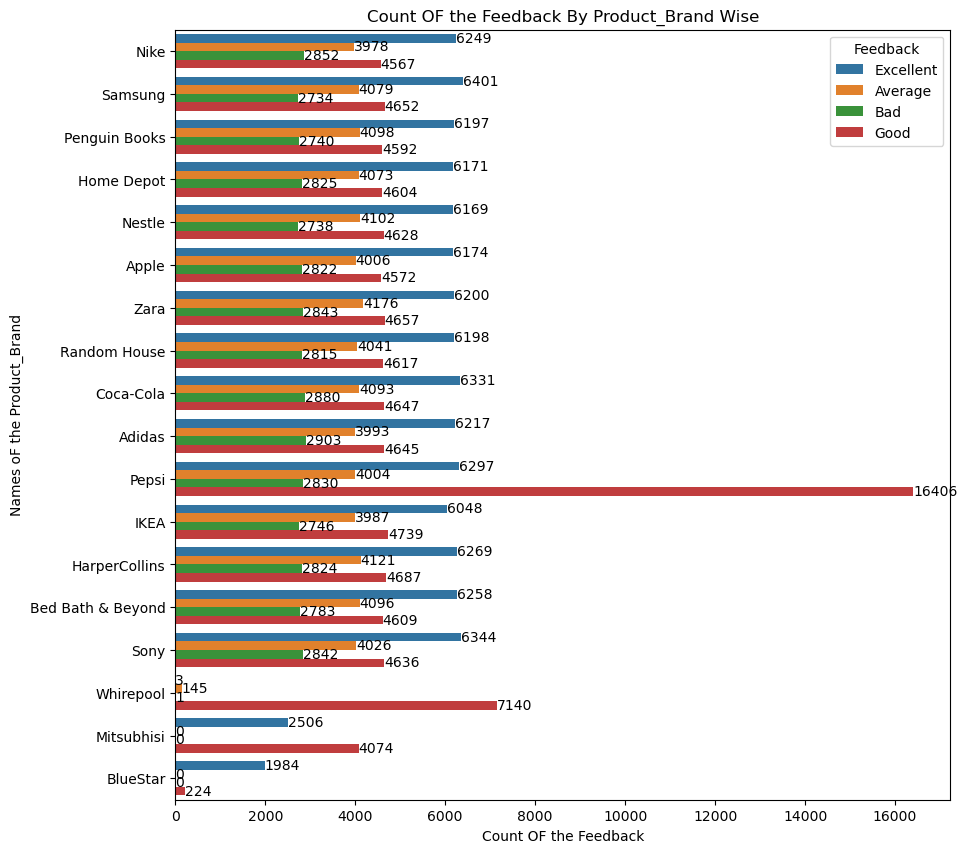

In [83]:
# count of feedback
plt.figure(figsize=(10,10))
# create a countplot
ax=sns.countplot(data=df,y='Product_Brand',hue='Feedback')
for bars in ax.containers:
    ax.bar_label(bars)

plt.ylabel('Names oF the Product_Brand')  
plt.xlabel('Count OF the Feedback')
plt.title('Count OF the Feedback By Product_Brand Wise')
    

# Sum Of Total Ratings By Top 10 Product Brand

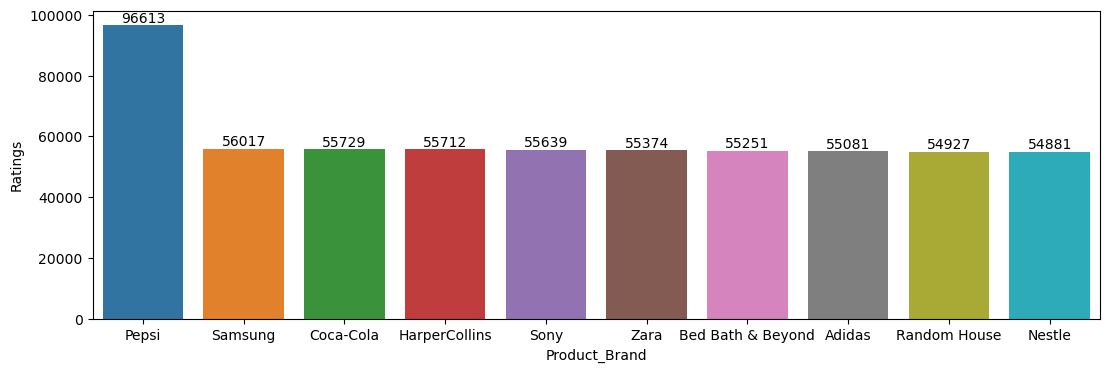

In [56]:
# total rating found which Top 10 Proudct Brand
plt.figure(figsize=(13,4))
sum_rating = df.groupby(['Product_Brand'])['Ratings'].sum().reset_index()

# top_10_product_brand
top_brand=sum_rating.sort_values(by='Ratings',ascending=False).head(10)

# create a barplot
ax=sns.barplot(data=top_brand,x='Product_Brand',y='Ratings')
for bars in ax.containers:
    ax.bar_label(bars)

# sum of total amount  which Top 10 Proudct Brand

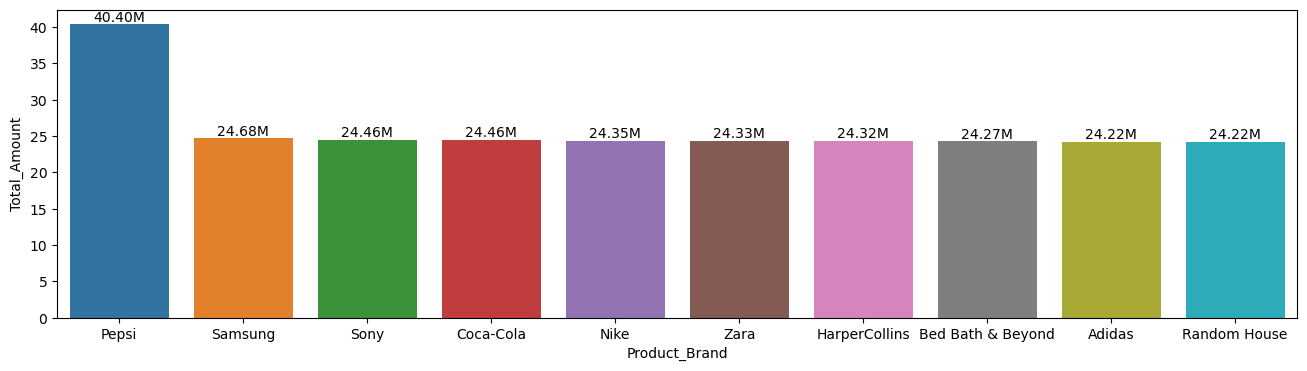

In [57]:
# sum of total amount  which Top 10 Proudct Brand
plt.figure(figsize=(16,4))
sum_rating = df.groupby(['Product_Brand'])['Total_Amount'].sum().reset_index()

# convert values in millions
sum_rating['Total_Amount'] = sum_rating['Total_Amount'] / 1_000_000

# top_10_product_brand
top_brand=sum_rating.sort_values(by='Total_Amount',ascending=False).head(10)

# create a barplot
ax=sns.barplot(data=top_brand,x='Product_Brand',y='Total_Amount')
for bars in ax.containers:
    ax.bar_label(bars,fmt='%.2fM')

# which Product  Category How many times bought  which country and which Year

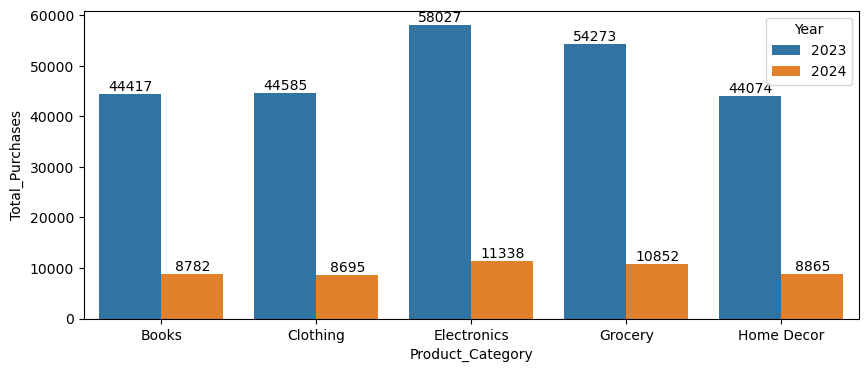

In [58]:
# count of Product category how many times bought
plt.figure(figsize=(10,4))
count_category = df.groupby(['Product_Category','Year'])['Total_Purchases'].count().reset_index()
# create a bar plot
ax=sns.barplot(data=count_category,x='Product_Category',y='Total_Purchases',hue='Year')
for bars in ax.containers:
    ax.bar_label(bars)

# Sum Of total Amount Pay by Payment Method and which and Country Wise

Text(0.5, 1.0, 'Sum Of Total Amount By Payment Method')

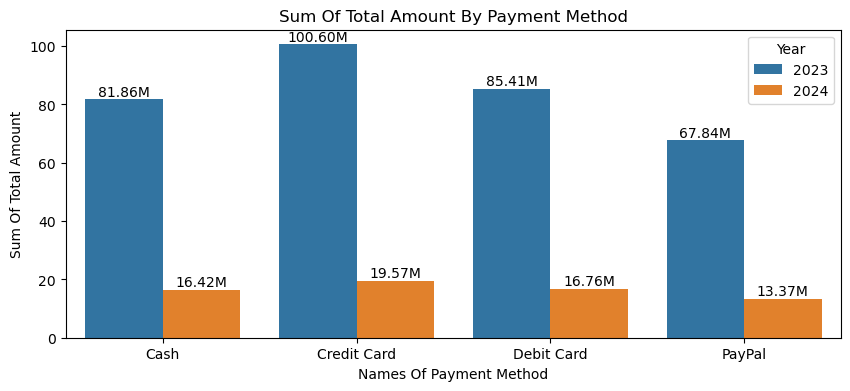

In [59]:
# sum of total amount by year and paymet method
plt.figure(figsize=(10,4))
sum_amount = df.groupby(['Payment_Method','Year'])['Total_Amount'].sum().reset_index()
# convert values in millions
sum_amount['Total_Amount'] = sum_amount['Total_Amount'] / 1_000_000
# create barchart

ax=sns.barplot(data=sum_amount,x='Payment_Method',y='Total_Amount',hue='Year')
for bars in ax.containers:
    ax.bar_label(bars,fmt='%.2fM')
plt.xlabel('Names Of Payment Method')  
plt.ylabel('Sum Of Total Amount')
plt.title('Sum Of Total Amount By Payment Method')

In [60]:
# Which Brand Order Staus what are situation


count of Order status by Product Brand

Text(0.5, 1.0, 'Count Of Order_Status By Each Product Brand')

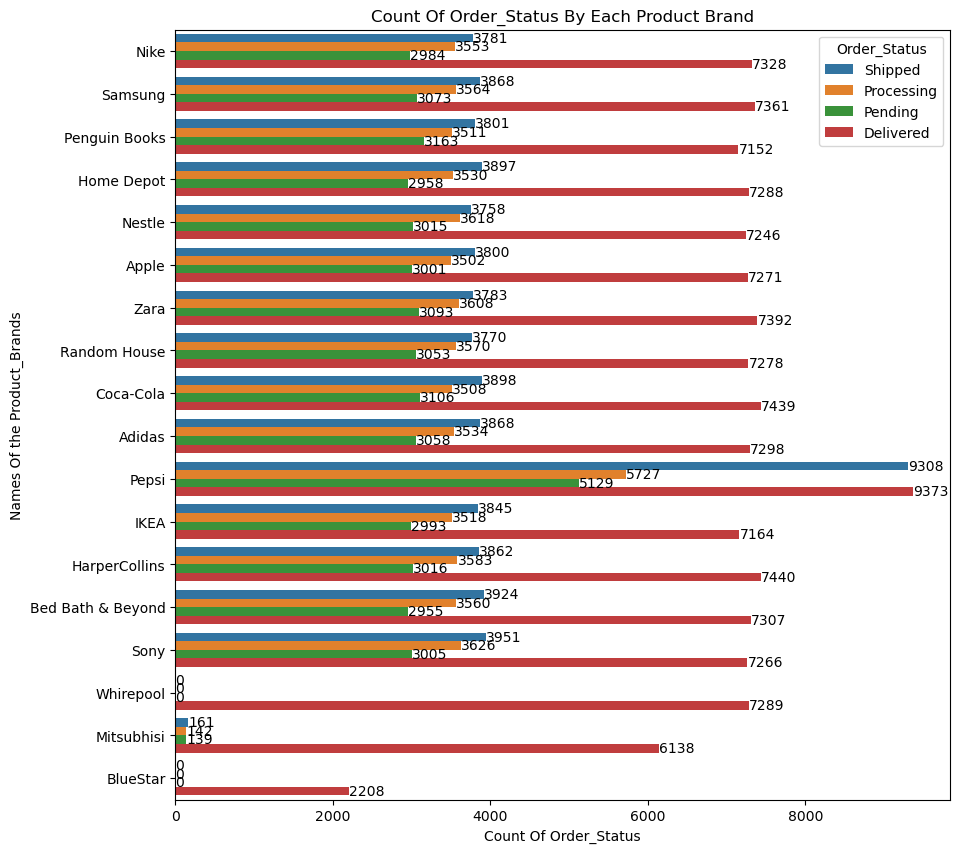

In [82]:
# count of Order status by Product Brand
plt.figure(figsize=(10,10))
# create a countplot
ax=sns.countplot(data=df,y='Product_Brand',hue='Order_Status')
for bars in ax.containers:
    ax.bar_label(bars)
plt.xlabel('Count Of Order_Status')  
plt.ylabel('Names Of the Product_Brands')
plt.title('Count Of Order_Status By Each Product Brand')

# total amount by orders status 

Text(0.5, 1.0, 'Sum Of total amount by Order_Status')

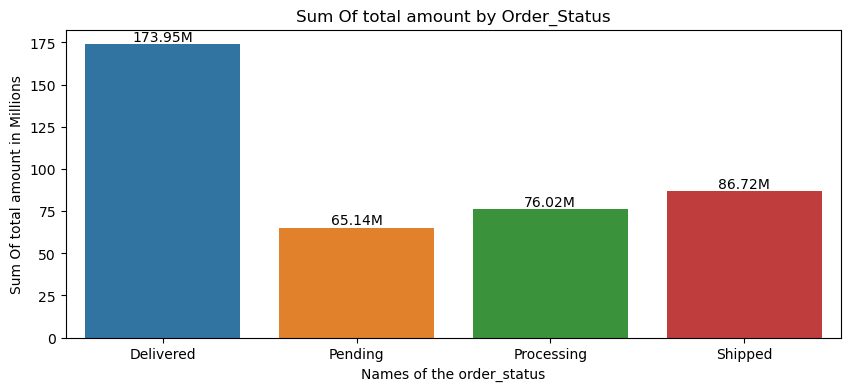

In [81]:
# sum of total amount by order status
plt.figure(figsize=(10,4))
sum_amount = df.groupby(['Order_Status'])['Total_Amount'].sum().reset_index()

# convert values in millions
sum_amount['Total_Amount'] = sum_amount['Total_Amount'] / 1_000_000

# create a pie chart
ax=sns.barplot(data=sum_amount,x='Order_Status',y='Total_Amount')
for bars in ax.containers:
    ax.bar_label(bars,fmt='%.2fM')

plt.xlabel('Names of the order_status')  
plt.ylabel('Sum Of total amount in Millions')
plt.title('Sum Of total amount by Order_Status')

Text(0.5, 1.0, 'Total Sum Of Total_Amount By Order_Status And Year Wise')

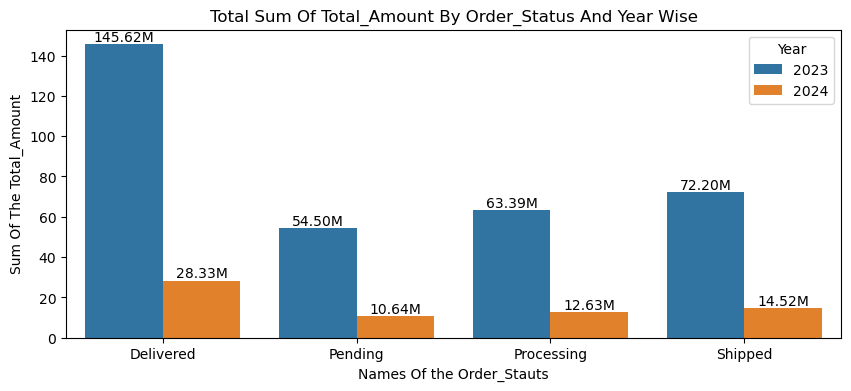

In [80]:
# which Wise show order_status 
plt.figure(figsize=(10,4)) 
order_amount = df.groupby(['Order_Status','Year'])['Total_Amount'].sum().reset_index()
# convert values in Millions
order_amount['Total_Amount']=order_amount['Total_Amount'] / 1_000_000 

# create a barplot
ax=sns.barplot(data=order_amount,x='Order_Status',y='Total_Amount',hue='Year')
for bars in ax.containers:
    ax.bar_label(bars,fmt='%.2fM')

plt.xlabel('Names Of the Order_Stauts')
plt.ylabel('Sum Of The Total_Amount')
plt.title('Total Sum Of Total_Amount By Order_Status And Year Wise')